In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

pd.set_option('max_columns', None)
sns.set_theme(style="ticks")

In [41]:
all_teams_full = pd.read_csv('all_teams_full_cleaned.csv')

In [42]:
all_features = all_teams_full.drop(columns=['TEAM_ID', 'TEAM_NAME', 'YEAR'])

In [43]:
all_features

,WIN_PCT,FG_PCT,REB,AST_TOV_RAT,PTS,OPP_PPG,HOME_WIN_PCT,PLAYOFF,TOP3_PPG,TOP3_P14,OFF_BENCH_PPG,BENCH_P30
0,0.439,0.471,44.5,1.514793,108.6,111.3,0.487805,1,18.032740,1,34.951220,1
1,0.354,0.480,43.2,1.465116,107.8,110.6,0.390244,0,18.894844,1,28.853659,0
2,0.378,0.470,44.8,1.182741,104.4,108.2,0.609756,0,17.705386,1,31.109756,1
3,0.512,0.490,40.3,1.440000,104.5,103.7,0.756098,1,16.714243,1,27.926829,0
4,0.695,0.502,42.8,1.714286,108.8,101.2,0.902439,1,18.791115,1,28.060976,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1105,0.622,0.471,47.8,1.805369,115.2,112.5,0.756098,1,20.830769,1,23.475610,0
1106,0.589,0.468,45.4,1.816901,110.7,108.4,0.885714,1,19.672070,1,37.109756,1
1107,0.681,0.476,45.1,1.645833,113.6,108.1,0.805556,1,20.753404,1,38.341463,1
1108,0.622,0.466,42.3,1.896000,109.9,107.3,0.585366,1,21.757569,1,28.048780,0


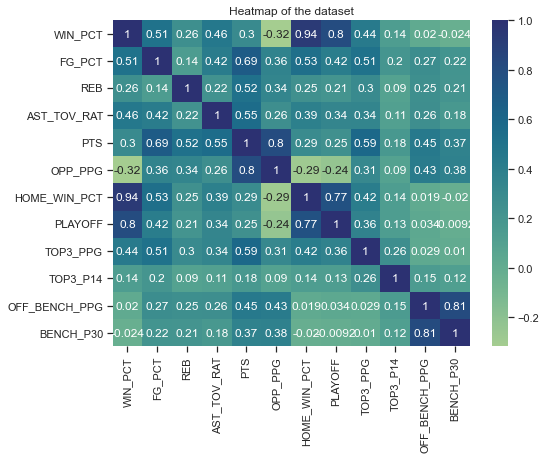

In [44]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    all_features.corr(), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

In [45]:
all_features_scaled = all_features.copy()

In [46]:
all_features_scaled['REB'] = all_features_scaled['REB']/100
all_features_scaled['PTS'] = all_features_scaled['PTS']/100
all_features_scaled['OPP_PPG'] = all_features_scaled['OPP_PPG']/100
all_features_scaled['TOP3_PPG'] = all_features_scaled['TOP3_PPG']/100
all_features_scaled['OFF_BENCH_PPG'] = all_features_scaled['OFF_BENCH_PPG']/100


In [47]:
all_features_scaled

,WIN_PCT,FG_PCT,REB,AST_TOV_RAT,PTS,OPP_PPG,HOME_WIN_PCT,PLAYOFF,TOP3_PPG,TOP3_P14,OFF_BENCH_PPG,BENCH_P30
0,0.439,0.471,0.445,1.514793,1.086,1.113,0.487805,1,0.180327,1,0.349512,1
1,0.354,0.480,0.432,1.465116,1.078,1.106,0.390244,0,0.188948,1,0.288537,0
2,0.378,0.470,0.448,1.182741,1.044,1.082,0.609756,0,0.177054,1,0.311098,1
3,0.512,0.490,0.403,1.440000,1.045,1.037,0.756098,1,0.167142,1,0.279268,0
4,0.695,0.502,0.428,1.714286,1.088,1.012,0.902439,1,0.187911,1,0.280610,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1105,0.622,0.471,0.478,1.805369,1.152,1.125,0.756098,1,0.208308,1,0.234756,0
1106,0.589,0.468,0.454,1.816901,1.107,1.084,0.885714,1,0.196721,1,0.371098,1
1107,0.681,0.476,0.451,1.645833,1.136,1.081,0.805556,1,0.207534,1,0.383415,1
1108,0.622,0.466,0.423,1.896000,1.099,1.073,0.585366,1,0.217576,1,0.280488,0


In [48]:
test_model_new_features = all_features_scaled[['WIN_PCT', 'FG_PCT','REB','AST_TOV_RAT','OPP_PPG', 'PTS', 'TOP3_PPG']]

In [49]:
data_X = test_model_new_features[['FG_PCT','REB','AST_TOV_RAT','OPP_PPG', 'PTS', 'TOP3_PPG']]
data_Y = test_model_new_features['WIN_PCT']
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, 
                                                    test_size = 0.2, random_state = 7)

In [50]:
# Write out OLS formula as a string
ols_formula = "WIN_PCT ~ FG_PCT + AST_TOV_RAT + REB + OPP_PPG + TOP3_PPG"

# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                WIN_PCT   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     710.0
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          3.11e-306
Time:                        11:27:56   Log-Likelihood:                 1126.1
No. Observations:                 888   AIC:                            -2240.
Df Residuals:                     882   BIC:                            -2211.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2025      0.072    -16.810      0.000      -1.343      -1.062
FG_PCT          3.7386      0.149     25.154      0.000       3.447       4.030
AST_TOV_RAT     0.2208      0.012     17.821      0.000       0.196       0.245
REB             2.2987      0.119     19.342      0.000       2.065       2.532
OPP_PPG        -1.5434      0.035    -43.586      0.000      -1.613      -1.474
TOP3_PPG        1.3708      0.114     12.010      0.000       1.147       1.595
==============================================================================
Omnibus:                        5.415   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                5.368
Skew:                           0.157   Prob(JB):                       0.0683
Kurtosis:                       3.216   Cond. No.                         166.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
fitted_values = model.predict(X_test)
residuals = fitted_values - y_test

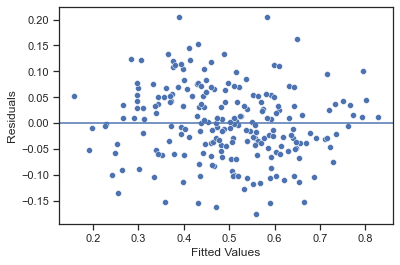

In [52]:
# Create a scatterplot of residuals against fitted values

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

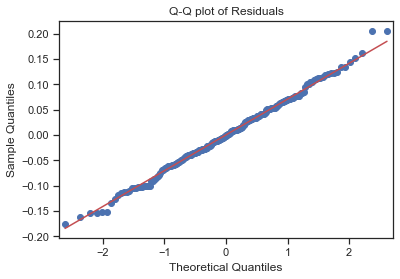

In [53]:
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

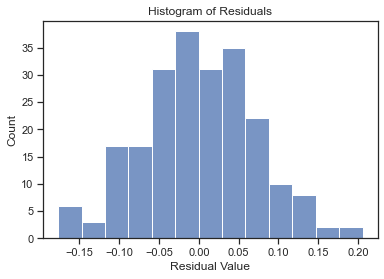

In [54]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()